As well as importing numpy, we will also use an IPython *magic* command to get plotting to work in the notebook. There are other magic commands that we will use occasionally. They start with %

The plotting library that we will use is called matplotlib (because it was originally aiming to be like matlab plotting, but for Numpy). You can do a lot with it, and we will barely scratch the surface. I've given a set of basic examples of using it below. Far more examples (along with an API and documentation) is available at https://matplotlib.org/gallery/index.html 

In the notebook, the last command in each cell gets printed. If this is a plot, you get a line of text description of that. You can suppress this by adding a ; to the end of the line, which is what I've done here.

In [4]:
import numpy as np

# Now set up plotting -- import the plotting library, and then tell it to plot in the notebook
import matplotlib.pyplot as pl
%matplotlib inline

Basic Plots and Errorbars
===

It's generally easiest to set up the axes to plot on using the subplots function, even if you only have 1 plot.

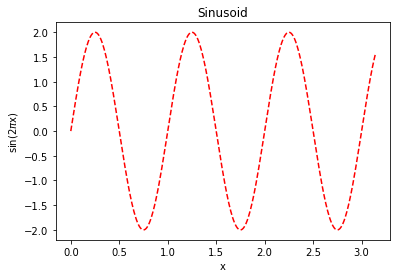

In [39]:
# A very simple plot of some data, with labels on the axes and a title

# Some data to plot
t = np.arange(0, np.pi, 0.01)
x = np.sin(2 * np.pi * t) * 2

# A figure and set of axes to plot it in
fig, ax = pl.subplots()

# Now plot it as a dashed line in red 
# To see the many options for plot lines, whether to mark the points, etc, use ?pl.plot
ax.plot(t, x, 'r--')

# And plot another line
# Add labels to the axes, and a title. Note that you can typeset maths inside $$
ax.set(xlabel='x', ylabel='sin(2$\pi$x) ', title='Sinusoid')

# This is how you save a figure
fig.savefig("sinusoid.png");

<ErrorbarContainer object of 3 artists>

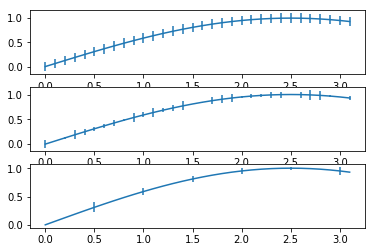

In [37]:
# Error bars are also easy
t = np.arange(0, np.pi, 0.1)
x = np.sin(t/5*np.pi)

# Make three plots to put examples in
fig, ax = pl.subplots(nrows=3,ncols=1)

# In the first set of axes, put constant errors bars
ax[0].errorbar(t, x, yerr=0.1)

# In the second set, specify a value for each one
ax[1].errorbar(t, x, yerr=0.1*np.random.rand(len(x)))

# In the third set, plot only every 5th error bar
ax[2].errorbar(t, x, yerr=0.1*np.random.rand(len(x)),errorevery=5);


Histograms
===

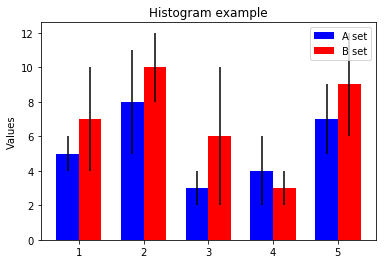

In [53]:
# A basic histogram

# The data we are going to plot
a_means, a_std = (5, 8, 3, 4, 7), (1, 3, 1, 2, 2)
b_means, b_std = (7, 10, 6, 3, 9), (3, 2, 4, 1, 3)

# The base points of the bars and their width
ind = np.arange(len(a_means))  
width = 0.35  

fig, ax = pl.subplots()
# The actual bars, with error bars
rects1 = ax.bar(ind - width/2, a_means, width, yerr=a_std,
                color='Blue', label='A set')
rects2 = ax.bar(ind + width/2, b_means, width, yerr=b_std,
                color='Red', label='B set')

# Labels
ax.set_ylabel('Values')
ax.set_title('Histogram example')
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', '3', '4', '5'))
ax.legend();

Scatter plots
===

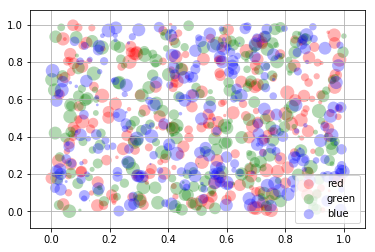

In [43]:
fig, ax = pl.subplots()
# Loop over three colours to make an example
for colour in ['red', 'green', 'blue']:
    # Make 250 random points for each
    n = 250
    x, y = np.random.rand(2, n)
    # Make the points different sizes
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=colour, s=scale, label=colour,alpha=0.3, edgecolors='none')

ax.legend()

# Add a grid to make it easier to read where the points are
ax.grid(True);

Box plot
===

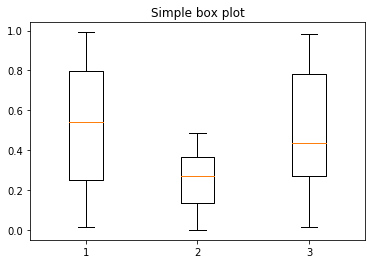

In [67]:
# Some random data
data = np.random.rand(100,3)
data[:,1] /= 2

fig, ax = pl.subplots()

# There are lots of options for the box and whiskers, but I'm just showing the basics
ax.boxplot(data)
ax.set_title('Simple box plot');

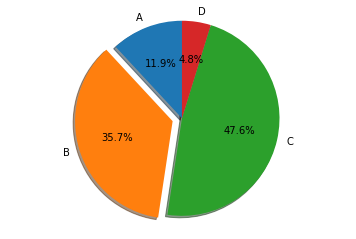

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A', 'B', 'C', 'D'
sizes = [5, 15, 20, 2]
# Make the second ('B') component stand out
explode = (0, 0.1, 0, 0)  

fig, ax = pl.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# This makes sure the chart appears circular
ax.axis('equal');  

In [61]:
?pl.boxplot